In [5]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import imodelsx.process_results
from collections import defaultdict
import numpy as np
import viz
import sys
sys.path.append('../experiments/')
results_dir = '/home/chansingh/mntv1/compiling/oct9'

r = imodelsx.process_results.get_results_df(results_dir)
experiment_filename = '../experiments/02_fit_compiling.py'
r = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename)
# r.to_pickle('../results/tprompt_results.pkl')

# r = pd.read_pickle('../results/tprompt_results.pkl')
# ravg = r[r.seed == 1]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 22/22 [00:00<00:00, 54.36it/s]


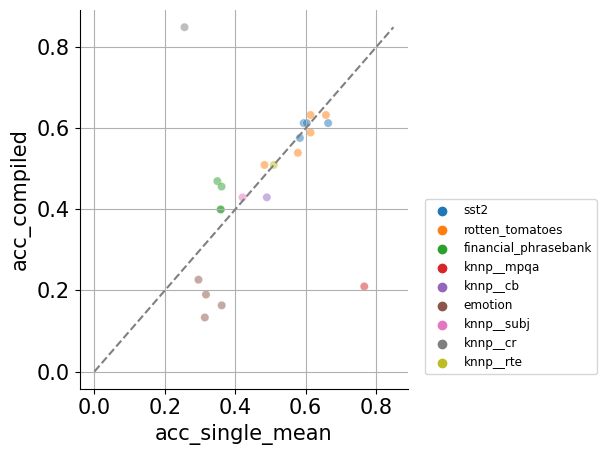

In [6]:
y = 'acc_compiled'
x = 'acc_single_mean'
# x = 'acc_single_max'
sns.scatterplot(data=r, x=x, y=y, hue='dataset_name', alpha=0.5)
top = max(r[x].max(), r[y].max())
bot = min(r[x].min(), r[y].min())
plt.plot([0, top], [0, top], '--', color='gray')
plt.grid()
# move legend outside plot
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2,
           borderaxespad=0., fontsize='xx-small')
plt.show()